## This is script classify digit '0' against all the other digits '1', '2', '3', '4', '5', '6', '7', '8', '9' using linear bi-partitioning function and sign function.

## Name : Jee-Hye Yang

## Student ID : 20145708

## GitHub address : https://github.com/geehyeS2/assignment10

In [50]:
### import packages for plottion graphs and manipulating data:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

In [52]:
### upload mnist_train and test file and save the vector as an array.

In [53]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image
alpha = 0
p = 1
classinit = 9
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")
traindata = np.array(train)
testdata = np.array(test)
label = [] 

In [54]:
### If there is a matrix whose entire column is 0, remove it from the data set.

In [55]:
#
# distinguish x and y.
# y is the label.
#
train_y, train_x = np.split(traindata, [1], axis=1)
test_y, test_x = np.split(testdata, [1], axis=1)

In [56]:
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - data.min()) / (data.max() - data.min())
    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    return(s)

#
# Defined the sign function.
#
def sign(data, alpha = 0):
    return np.where(data>=alpha, 1, -1)


#
#random Value Function
#
def randomValue(X,p):
    n = np.random.normal(0,1,(p,X.shape[1]))
    return (n)

#RV = randomValue(train_x,p)

#
#Chagevalue
#
def ChangeFeature(X,p):
    A = np.zeros((X.shape[0], p))
    for j in range(X.shape[0]):
        for i in range(p):
            A[j][i] = np.dot(X[j],random[i].T) 
    return A

#CF = ChangeFeature(train_x)
#nor_x = normalize(trian_x)

#
# Defined an approximation function using sudo inverse.
# X : number of sample * feature(pixel) -> (matrix)
# y : sample * 1  -> (matrix)
#
def approximation(X, y, p ,classinit):
    array = []
    X = np.where(np.isnan(X), 0, X)
    X = normalize(X)
    train_A = ChangeFeature(X,p) 
    for i in range(classinit):
        temp = np.where(y == i,1,-1)
        k = np.dot(np.dot(lin.inv(np.dot(train_A.T, train_A)), train_A.T), temp)
        array.append(k)
        positive_index = np.where(sign(np.dot(train_A,k)) == 1)[0] 
        train_A = np.delete(train_A, positive_index, axis = 0)
        y = np.delete(y, positive_index)            
    return (array)


#
# Defined predict function using sign function
#


def predict(test_x, array, p, classinit):
    test_A = ChangeFeature(normalize(test_x), p)
    y = np.ones(test_x.shape[0])
    finished_index = np.empty(0)
    for i in range(classinit):
        #print(array[i].shape)
        temp_index = np.where(sign(np.dot(test_A, array[i])).astype(int) == 1)[0] 
        for j in temp_index:
            if not j in finished_index:
                y[j] = i
        if i == classinit-1:
            negative_index = np.where(sign(np.dot(test_A, array[i])).astype(int) == -1)[0]
            for j in negative_index:
                if not j in finished_index:
                    y[j] = classinit
        finished_index = np.concatenate((finished_index, temp_index))
            
    return y.astype(int)
    
    

/Users/geehyeS2/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


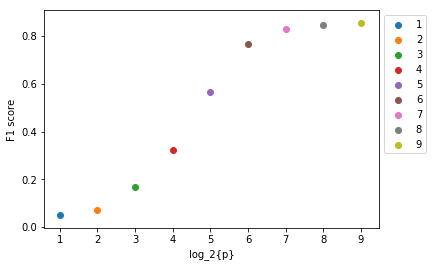

Maximum F1 score : 0.8538344470665681 When p =  512
[[ 918    0    1    4    0    5    8    1    3   40]
 [   0 1053    2    1    1    2    3    3   29   41]
 [  12   18  767   45   10    1   21   21   51   86]
 [   5    3   11  791    0   27    8   15   29  121]
 [   1    6    6    0  803    0    6    1    7  152]
 [   8    8    2   31   10  681   17   18   55   62]
 [  14    6    9    2    8   19  863    0   12   25]
 [   9   17    8   13   15    1    0  883    1   80]
 [   5   12    4    8   12   23   10    4  783  113]
 [   6    1    1    6   18    2    0    8    6  961]]


In [57]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

x = np.arange(1,10)
max_f1_score = 0
max_p = 0
result_y_predict = np.zeros(test_y.shape)
for i in x:
    #classinit = 9
    #p = 2**i
    random = randomValue(test_x,2**i)
    app = approximation(train_x, train_y, 2**i,9)# get train x and y using approximation function
    y_predict = predict(test_x, app, 2**i,9) # using sign function get y_predict
    #print(np.unique(y_predict))
    y=f1_score(test_y, y_predict, average='macro', labels=np.unique(test_y))
    if y>max_f1_score:
        max_f1_score = y
        max_p = i
        result_y_predict = y_predict
    plt.scatter(i, y, label=i)
    
plt.ylabel("F1 score")
plt.xlabel("log_2{p}")
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print("Maximum F1 score :",max_f1_score, "When p = ", 2**max_p)
print(confusion_matrix(test_y, result_y_predict))

